In [1]:
#import own functions
from data_import import import_data
from create_statespace import create_statespace
from data_clean import clean_data

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

np.random.seed(42)
# set app, either "EVOKE" or "MOMENT"
app = "EVOKE"

In [2]:
# create statespace based on chosen app
environments, intents, states = create_statespace(app)

# import Data and create lists for all 4 files and combine them
paths = ['part-00000-tid-5172624987854127169-b1684884-bebf-43d9-bb55-f03708dbec1f-5531-1-c000.json',
         'part-00001-tid-5172624987854127169-b1684884-bebf-43d9-bb55-f03708dbec1f-5532-1-c000.json',
         'part-00002-tid-5172624987854127169-b1684884-bebf-43d9-bb55-f03708dbec1f-5533-1-c000.json',
         'part-00003-tid-5172624987854127169-b1684884-bebf-43d9-bb55-f03708dbec1f-5534-1-c000.json']

data_cleaned, data_IDs, data_states, data_settings, data_envs, data_intents, data_progress, data_duration, data_usage, data_matrix_x, data_matrix_m, data_vector_y = import_data(paths, app, return_all=3)
print('Done getting Data')

Done getting Data


In [3]:
# unique ID
unique_IDs = list(set(data_IDs))

# create matrix for [Bass, Midrange, Treble] settings (they are currently in a list)
setting_vector = np.ones((len(data_settings),3))
setting_vector[:] = None

for i, setting in enumerate(data_settings):
    setting_vector[i, 0] = setting[0]
    setting_vector[i, 1] = setting[1]
    setting_vector[i, 2] = setting[2]
    
setting_vector = setting_vector.astype(int)

## Distributions

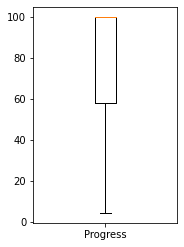

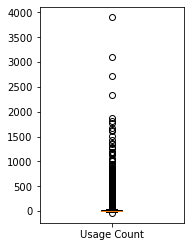

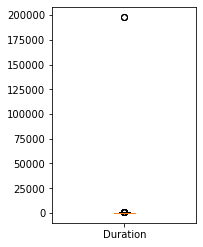

In [4]:
# plot progress, duration days, usage count Boxplot

# Creating plot
fig = plt.figure(figsize =(2, 3))
  
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
  
# Creating plot
bp = ax.boxplot([data_progress])
ax.set_xticklabels(['Progress'])
#plt.title(r'Progress')
# show plot
plt.show()

fig = plt.figure(figsize =(2, 3))
  
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
  
# Creating plot
bp = ax.boxplot([data_usage])
ax.set_xticklabels(['Usage Count'])
#plt.title(r'Usage Count')
# show plot
plt.show()

fig = plt.figure(figsize =(2, 3))
  
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
  
# Creating plot
bp = ax.boxplot([data_duration])
ax.set_xticklabels(['Duration'])
#plt.title(r'Duration')
# show plot
plt.show()

Text(0.5, 1.0, 'Duration days')

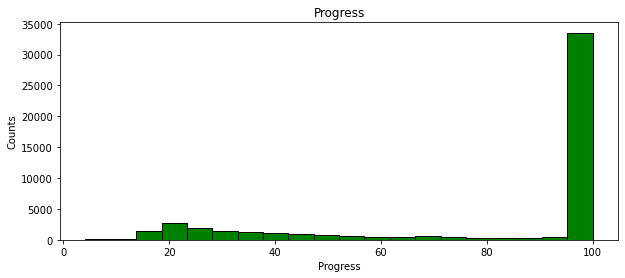

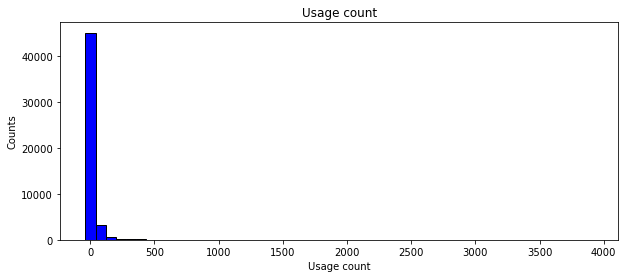

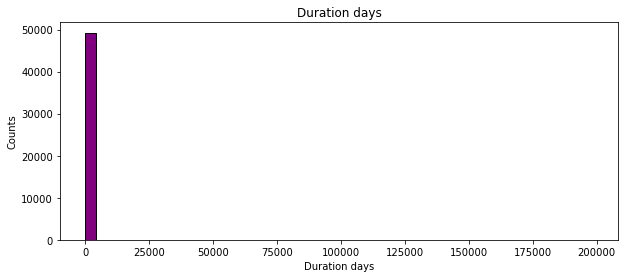

In [5]:
# plot progress, duration days, usage count hist

fig = plt.figure(figsize =(10, 4))
bins = 20
plt.hist(data_progress, bins, color='green', edgecolor='black', linewidth=1)
plt.xlabel('Progress')
plt.ylabel('Counts')
plt.title(r'Progress')

fig = plt.figure(figsize =(10, 4))
bins = 50
plt.hist(data_usage, bins, color='blue', edgecolor='black', linewidth=1)
plt.xlabel('Usage count')
plt.ylabel('Counts')
plt.title(r'Usage count')

fig = plt.figure(figsize =(10, 4))
bins = 50
plt.hist(data_duration, bins, color='purple', edgecolor='black', linewidth=1)
plt.xlabel('Duration days')
plt.ylabel('Counts')
plt.title(r'Duration days')

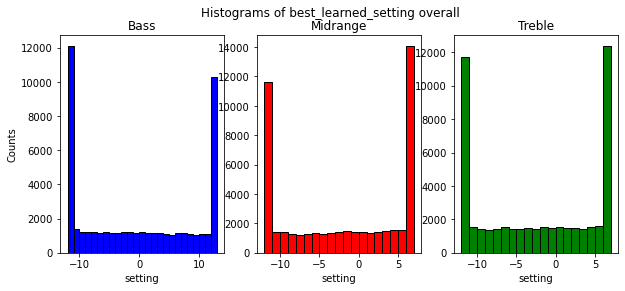

In [6]:
# plot the best learned settings histograms

fig = plt.figure(figsize =(10, 4))
plt.subplot(1, 3,1)
bins = list(range(-12,14))
plt.hist(setting_vector[:,0], bins, color='blue', edgecolor='black', linewidth=1)
plt.xlabel('setting')
plt.ylabel('Counts')
plt.title(r'Bass')

plt.subplot(1, 3,2)
bins = list(range(-12,8))
plt.hist(setting_vector[:,1], bins, color='red', edgecolor='black', linewidth=1)
plt.xlabel('setting')
#plt.ylabel('Counts')
plt.title(r'Midrange')

plt.subplot(1, 3,3)
bins = list(range(-12,8))
plt.hist(setting_vector[:,2], bins, color='green', edgecolor='black', linewidth=1)
plt.xlabel('setting')
#plt.ylabel('Counts')
plt.title(r'Treble')

plt.suptitle("Histograms of best_learned_setting overall")
plt.show()

Text(0.5, 1.0, 'number of saved settings per unique ID')

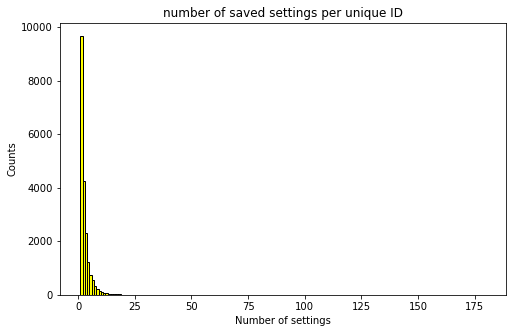

In [7]:
# plot histogram of number of programs per user

ID_title, ID_counts = np.unique(np.asarray(data_IDs),return_counts=True)
bins, counts = np.unique(np.asarray(ID_counts),return_counts=True)

fig = plt.figure(figsize =(8, 5))
plt.hist(ID_counts, bins, color='yellow', edgecolor='black', linewidth=1)
plt.xlabel('Number of settings')
plt.ylabel('Counts')
plt.title(r'number of saved settings per unique ID')

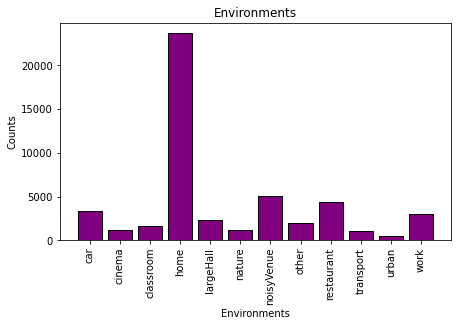

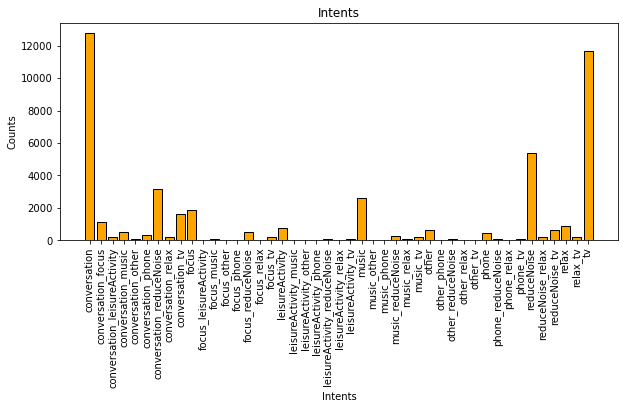

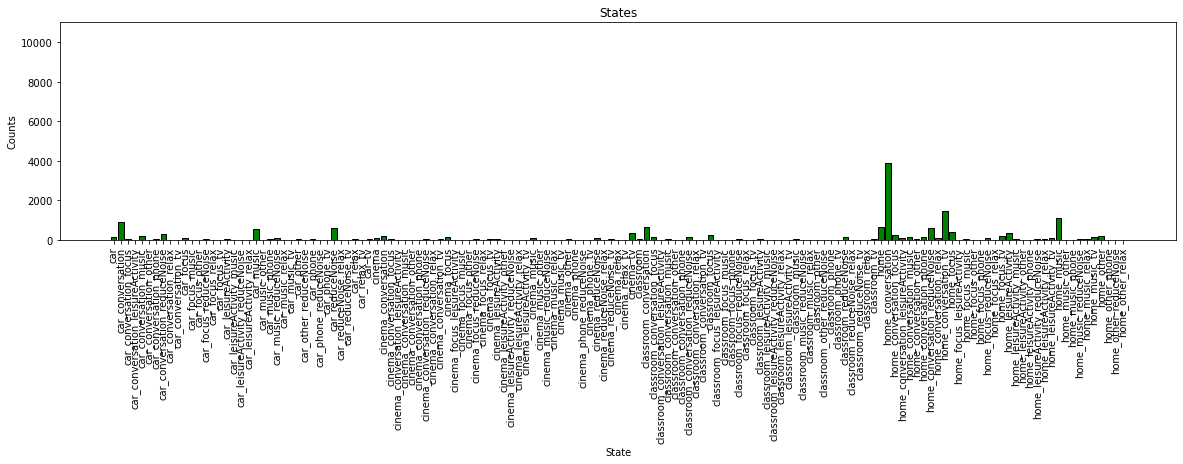

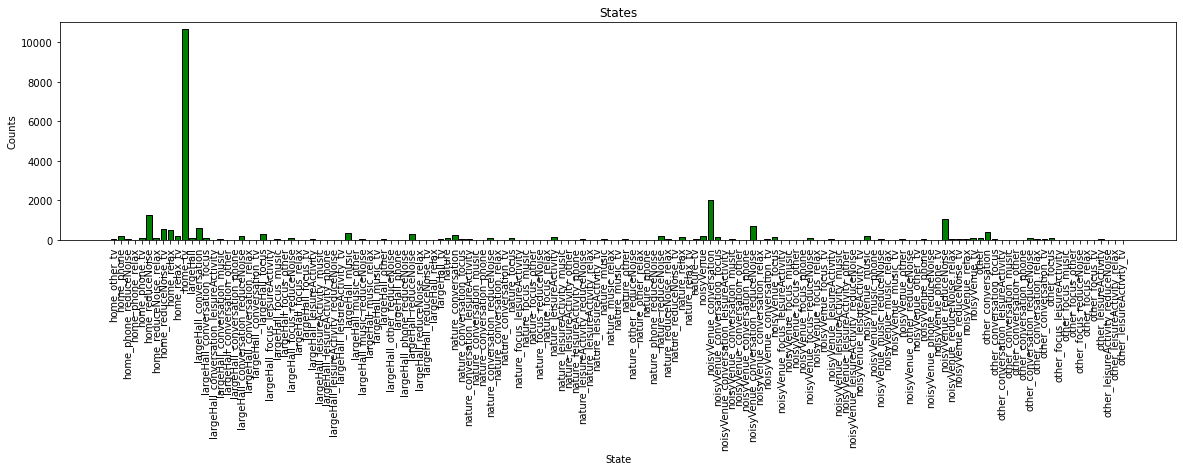

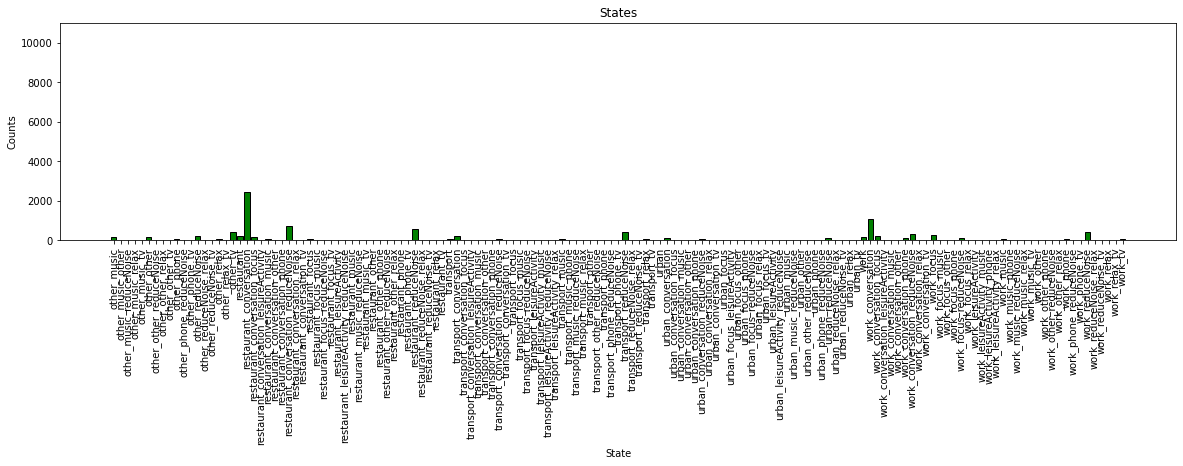

In [8]:
# sort the lists
data_envs.sort()
data_intents.sort()
data_states.sort()

# count the envs
env_titles, env_counts = np.unique(np.asarray(data_envs),return_counts=True)
# create the ints and count them
int_arr = []
for intent in data_intents:
    if len(intent) == 1:
        int_arr.append( intent[0])
    elif len(intent) == 2:
        int_arr.append( intent[0] + '_' + intent[1])      
int_titles, int_counts = np.unique(np.asarray(int_arr),return_counts=True)

# count the states
state_titles, state_counts = np.unique(np.asarray(data_states),return_counts=True)
# divide states into 3 cause there are too many to plot

split = len(state_counts)//3
state_titles_less1 = state_titles[:split]
state_counts_less1 = state_counts[:split]
state_titles_less2 = state_titles[split:split*2]
state_counts_less2 = state_counts[split:split*2]
state_titles_less3 = state_titles[split*2:]
state_counts_less3 = state_counts[split*2:]

# plot the histograms of environments  
fig = plt.figure(figsize =(7, 4))
plt.bar(env_titles,env_counts, color='purple', edgecolor='black', linewidth=1)
plt.xlabel('Environments')
plt.ylabel('Counts')
plt.title(r'Environments')
plt.xticks(rotation=90)
plt.show()

# plot the histograms of   intents
fig = plt.figure(figsize =(10, 4))
plt.bar(int_titles, int_counts, color='orange', edgecolor='black', linewidth=1)
plt.xlabel('Intents')
plt.ylabel('Counts')
plt.title(r'Intents')
plt.xticks(rotation=90)
plt.show()


# histogram of states
fig = plt.figure(figsize =(20, 4))
plt.bar(state_titles_less1, state_counts_less1, color='green', edgecolor='black', linewidth=1)
plt.xlabel('State')
plt.ylabel('Counts')
plt.title(r'States')
plt.ylim(0, 11000)
plt.xticks(rotation=90)
plt.show()

fig = plt.figure(figsize =(20, 4))
plt.bar(state_titles_less2, state_counts_less2, color='green', edgecolor='black', linewidth=1)
plt.xlabel('State')
plt.ylabel('Counts')
plt.title(r'States')
plt.ylim(0, 11000)
plt.xticks(rotation=90)
plt.show()

fig = plt.figure(figsize =(20, 4))
plt.bar(state_titles_less3, state_counts_less3, color='green', edgecolor='black', linewidth=1)
plt.xlabel('State')
plt.ylabel('Counts')
plt.title(r'States')
plt.ylim(0, 11000)
plt.xticks(rotation=90)
plt.show()



In [9]:
# split the settings based on state
sets = []
dts = np.asarray(data_states)
for state in states:
    set_state = setting_vector[dts==state]
    sets.append(set_state)

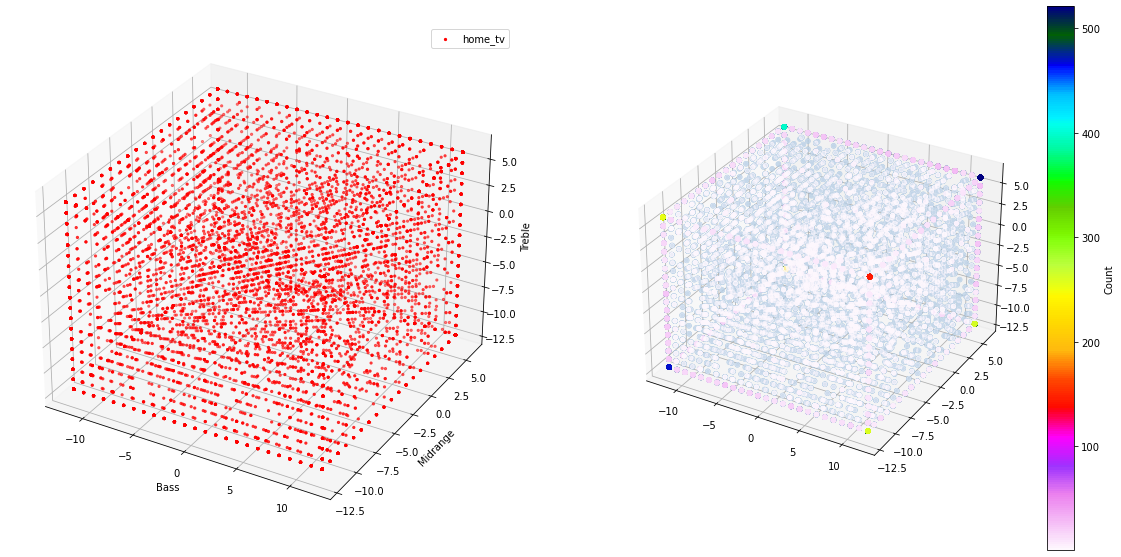

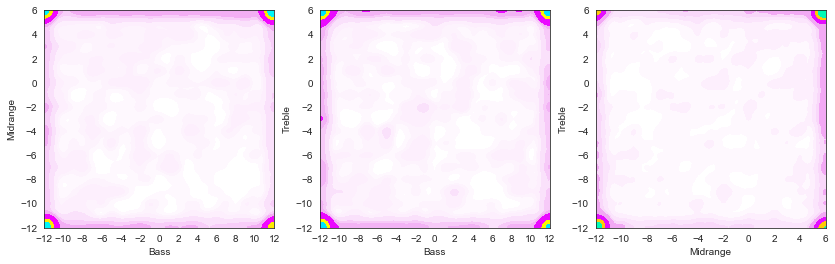

In [10]:
# 3D plot af best settings (we want density, but we have this for now)


# get index for desired state
state = 'home_tv'
index = states.index(state)
set_state = sets[index]

bass = set_state[:,0]
midrange = set_state[:,1]
treble = set_state[:,2]

# count how many times each setting occurs

np.all(list(set_state)[1] == list(set_state)[1])

state_matrix = np.zeros((25, 19, 19))
for setting in set_state:
    state_matrix[setting[0]+12,setting[1]+12,setting[2]+12] += 1

setting_count = np.zeros(set_state.shape[0])
for i, setting in enumerate(set_state):
    setting_count[i] = state_matrix[setting[0]+12,setting[1]+12,setting[2]+12]

# make plot wit chosen set
fig = plt.figure(figsize =(20, 10))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(bass, midrange, treble, c='r', marker='.',label=state)
ax.set_xlabel('Bass')
ax.set_ylabel('Midrange')
ax.set_zlabel('Treble')
leg = ax.legend();


# make plot wit chosen set from matrix


#fig = plt.figure(figsize =(10, 10))
ax = fig.add_subplot(122, projection='3d')
ax.scatter(bass, midrange, treble)
pnt3d=ax.scatter(bass, midrange, treble,c=setting_count, cmap='gist_ncar_r', label=state,edgecolor='face')
cbar=plt.colorbar(pnt3d)
cbar.set_label("Count")

plt.show()

# attempt 3 density plots
import seaborn as sns
# set seaborn style
sns.set_style("white")

fig = plt.figure(figsize =(14, 4))
plt.subplot(1, 3,1)
sns.kdeplot(x=bass, y=midrange, cmap="gist_ncar_r", shade=True, bw_adjust=0.3)
plt.xlabel('Bass')
plt.ylabel('Midrange')
plt.xlim(-12, 12)
plt.xticks(range(-12, 14, 2))
plt.ylim(-12, 6)
plt.yticks(range(-12, 8, 2))

plt.subplot(1, 3,2)
sns.kdeplot(x=bass, y=treble, cmap="gist_ncar_r", shade=True, bw_adjust=0.3)
plt.xlabel('Bass')
plt.ylabel('Treble')
plt.xlim(-12, 12)
plt.xticks(range(-12, 14, 2))
plt.ylim(-12, 6)
plt.yticks(range(-12, 8, 2))

plt.subplot(1, 3,3)
sns.kdeplot(x=midrange, y=treble, cmap="gist_ncar_r", shade=True, bw_adjust=0.3)
plt.xlabel('Midrange')
plt.ylabel('Treble')
plt.xlim(-12, 6)
plt.xticks(range(-12, 8, 2))
plt.ylim(-12, 6)
plt.yticks(range(-12, 8, 2))

#cbar=plt.colorbar(sns)


plt.show()


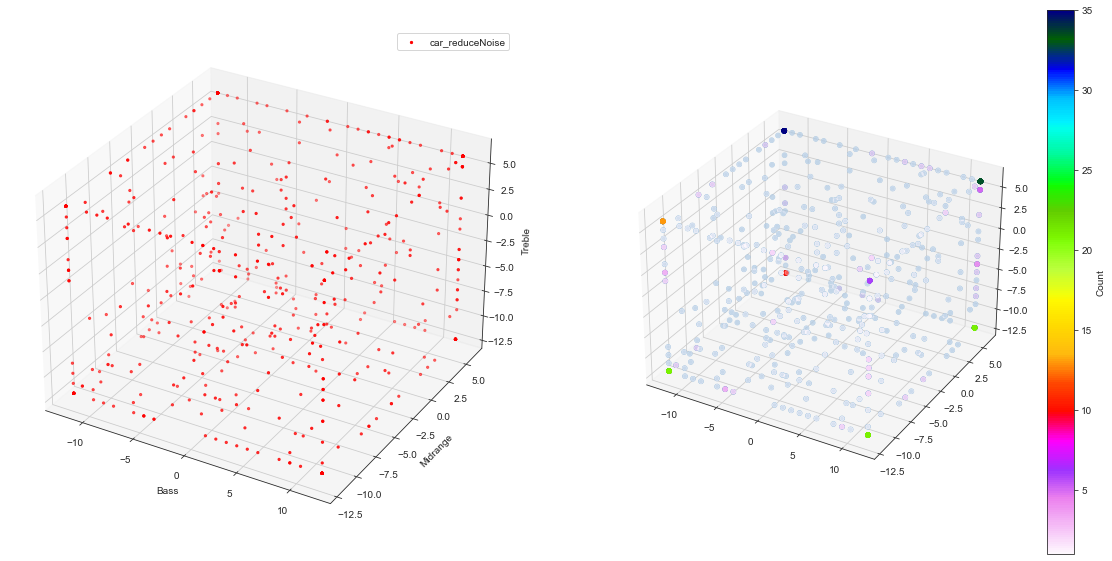

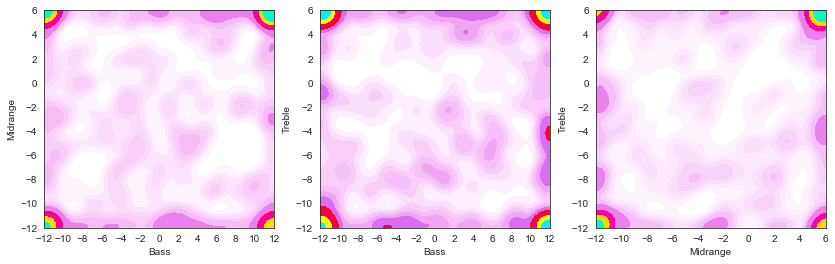

In [11]:
# 3D plot af best settings (we want density, but we have this for now)


# get index for desired state
state = 'car_reduceNoise'
index = states.index(state)
set_state = sets[index]

bass = set_state[:,0]
midrange = set_state[:,1]
treble = set_state[:,2]

# count how many times each setting occurs

np.all(list(set_state)[1] == list(set_state)[1])

state_matrix = np.zeros((25, 19, 19))
for setting in set_state:
    state_matrix[setting[0]+12,setting[1]+12,setting[2]+12] += 1

setting_count = np.zeros(set_state.shape[0])
for i, setting in enumerate(set_state):
    setting_count[i] = state_matrix[setting[0]+12,setting[1]+12,setting[2]+12]

# make plot wit chosen set
fig = plt.figure(figsize =(20, 10))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(bass, midrange, treble, c='r', marker='.',label=state)
ax.set_xlabel('Bass')
ax.set_ylabel('Midrange')
ax.set_zlabel('Treble')
leg = ax.legend();


# make plot wit chosen set from matrix


#fig = plt.figure(figsize =(10, 10))
ax = fig.add_subplot(122, projection='3d')
ax.scatter(bass, midrange, treble)
pnt3d=ax.scatter(bass, midrange, treble,c=setting_count, cmap='gist_ncar_r')
cbar=plt.colorbar(pnt3d)
cbar.set_label("Count")

plt.show()

# attempt 3 density plots
import seaborn as sns
# set seaborn style
sns.set_style("white")

fig = plt.figure(figsize =(14, 4))
plt.subplot(1, 3,1)
sns.kdeplot(x=bass, y=midrange, cmap="gist_ncar_r", shade=True, bw_adjust=0.3)
plt.xlabel('Bass')
plt.ylabel('Midrange')
plt.xlim(-12, 12)
plt.xticks(range(-12, 14, 2))
plt.ylim(-12, 6)
plt.yticks(range(-12, 8, 2))

plt.subplot(1, 3,2)
sns.kdeplot(x=bass, y=treble, cmap="gist_ncar_r", shade=True, bw_adjust=0.3)
plt.xlabel('Bass')
plt.ylabel('Treble')
plt.xlim(-12, 12)
plt.xticks(range(-12, 14, 2))
plt.ylim(-12, 6)
plt.yticks(range(-12, 8, 2))

plt.subplot(1, 3,3)
sns.kdeplot(x=midrange, y=treble, cmap="gist_ncar_r", shade=True, bw_adjust=0.3)
plt.xlabel('Midrange')
plt.ylabel('Treble')
plt.xlim(-12, 6)
plt.xticks(range(-12, 8, 2))
plt.ylim(-12, 6)
plt.yticks(range(-12, 8, 2))

#cbar=plt.colorbar(sns)


plt.show()
